In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.stats import jarque_bera
from scipy.stats import skewtest, kurtosistest
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None) # show full width of showing cols
pd.set_option("expand_frame_repr", False) # print cols side by side as it's supposed to be
pd.options.display.max_seq_items = 200000

In [46]:
DF = pd.read_excel('data/data8.xls')

In [47]:
# Percent of rented properties
DF['pctrnths'] = DF['rnthsg'] / DF['tothsg'] * 100

# Logarithm of percent of rented properties
DF['lpctrnths'] = np.log(DF['pctrnths'])

# Squared average income
DF['avgincsq'] = DF['avginc'] **2

In [48]:
DF80 = DF[DF['year'] == 80]
DF90 = DF[DF['year'] == 90]

DF80no = DF80[DF80['city'] != 5]
DF90no = DF90[DF90['city'] != 5]

In [49]:
# Calculate the diff for logarithm of change in percent of rented properties (lpctrnths)
pivot_df = DF.pivot(index='city', columns='year', values='lpctrnths')
pivot_df['clpctrnths'] = pivot_df[90] - pivot_df[80]
result_df = pivot_df.reset_index()

# Add new column 'clpctrnths' to DF90
DF90 = pd.merge(DF90,result_df,on='city',how='left')

## Simple linear regression with average income as only regressor

In [50]:
# Simple linear regression with average income as only regressor
X80 = DF80['avginc']
y80 = DF80['rent']

X80no = DF80no['avginc']
y80no = DF80no['rent']
model80 = sm.OLS(y80, sm.add_constant(X80)).fit()
model80no = sm.OLS(y80no, sm.add_constant(X80no)).fit()
y80pred = sm.add_constant(X80) @ model80.params.values

print("##### Linear regression for 1980 #######")
print(model80.summary())

print("##### Linear regression for 1980 with outlier removed #####")
print(model80no.summary())

X90 = DF90['avginc']
y90 = DF90['rent']
X90no = DF90no['avginc']
y90no = DF90no['rent']

model90 = sm.OLS(y90, sm.add_constant(X90)).fit()
model90no = sm.OLS(y90no, sm.add_constant(X90no)).fit()
y90pred = sm.add_constant(X90) @ model90.params.values

print()
print("##### Linear regression for 1980 with outlier removed #####")
print(model90no.summary())

print("##### Linear regression for 1990 #######")
print(model90.summary())

##### Linear regression for 1980 #######
                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     121.2
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           3.18e-16
Time:                        14:27:42   Log-Likelihood:                -296.49
No. Observations:                  64   AIC:                             597.0
Df Residuals:                      62   BIC:                             601.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

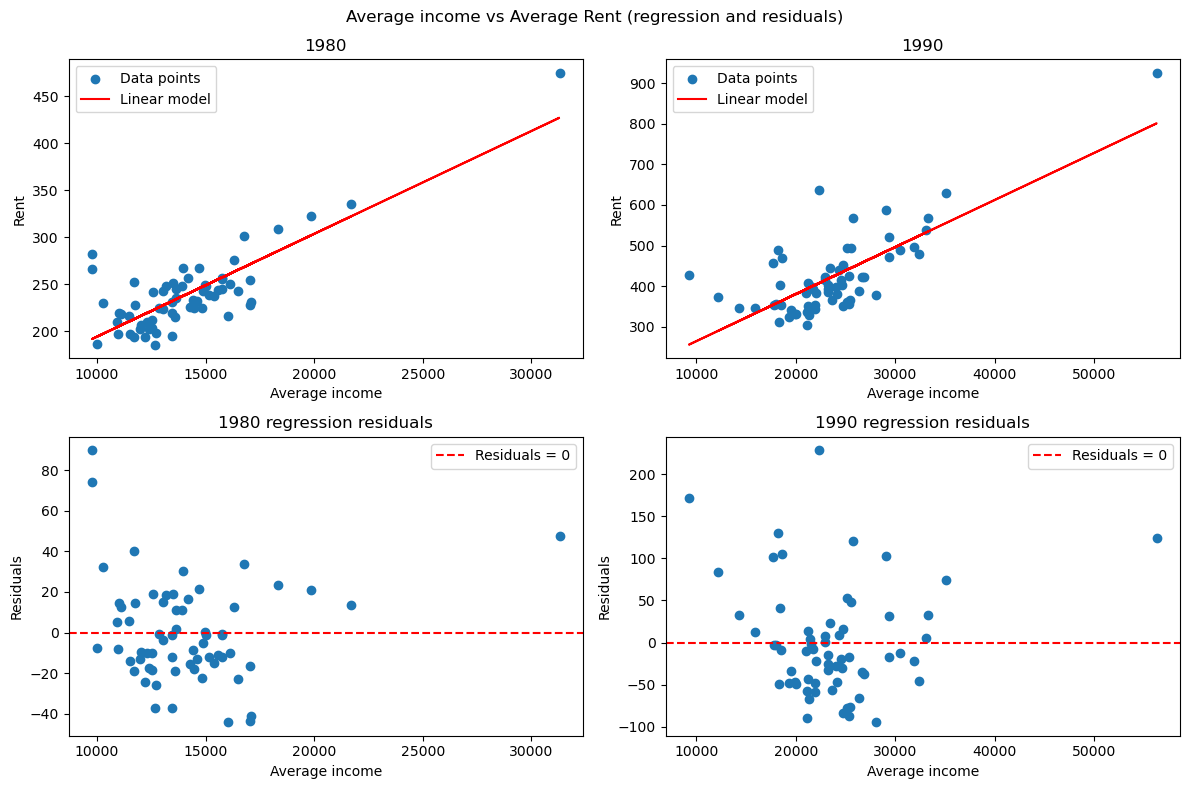

Beta coefficients with outlier:
1980: B0 = 85.10973124976658 B1 = 0.01093765621113998
1990: B0 = 148.7764397243888 B1 = 0.011580009045990894


In [51]:
# Plot linear regression and its residuals
_, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

ax1.scatter(X80, y80, label='Data points')
ax1.plot(X80, model80.params.const + model80.params.avginc * X80, label='Linear model', color='red')

ax2.scatter(X90, y90, label='Data points')
ax2.plot(X90, model90.params.const + model90.params.avginc * X90, label='Linear model', color='red')

ax3.scatter(X80, model80.resid)
ax3.axhline(y=0, color='r', linestyle='--', label='Residuals = 0')

ax4.scatter(X90, model90.resid)
ax4.axhline(y=0, color='r', linestyle='--', label='Residuals = 0')

ax1.set_title('1980')
ax1.set_xlabel("Average income")
ax1.set_ylabel("Rent")
ax1.legend()

ax2.set_title('1990')
ax2.set_xlabel("Average income")
ax2.set_ylabel("Rent")
ax2.legend()

ax3.set_title('1980 regression residuals')
ax3.set_xlabel("Average income")
ax3.set_ylabel("Residuals")
ax3.legend()

ax4.set_title('1990 regression residuals')
ax4.set_xlabel("Average income")
ax4.set_ylabel("Residuals")
ax4.legend()

plt.suptitle('Average income vs Average Rent (regression and residuals)')
plt.tight_layout()
plt.show()

# Print beta coefficients
print("Beta coefficients with outlier:")
print("1980: B0 =", model80.params.const, "B1 =", model80.params.avginc)
print("1990: B0 =", model90.params.const, "B1 =", model90.params.avginc)

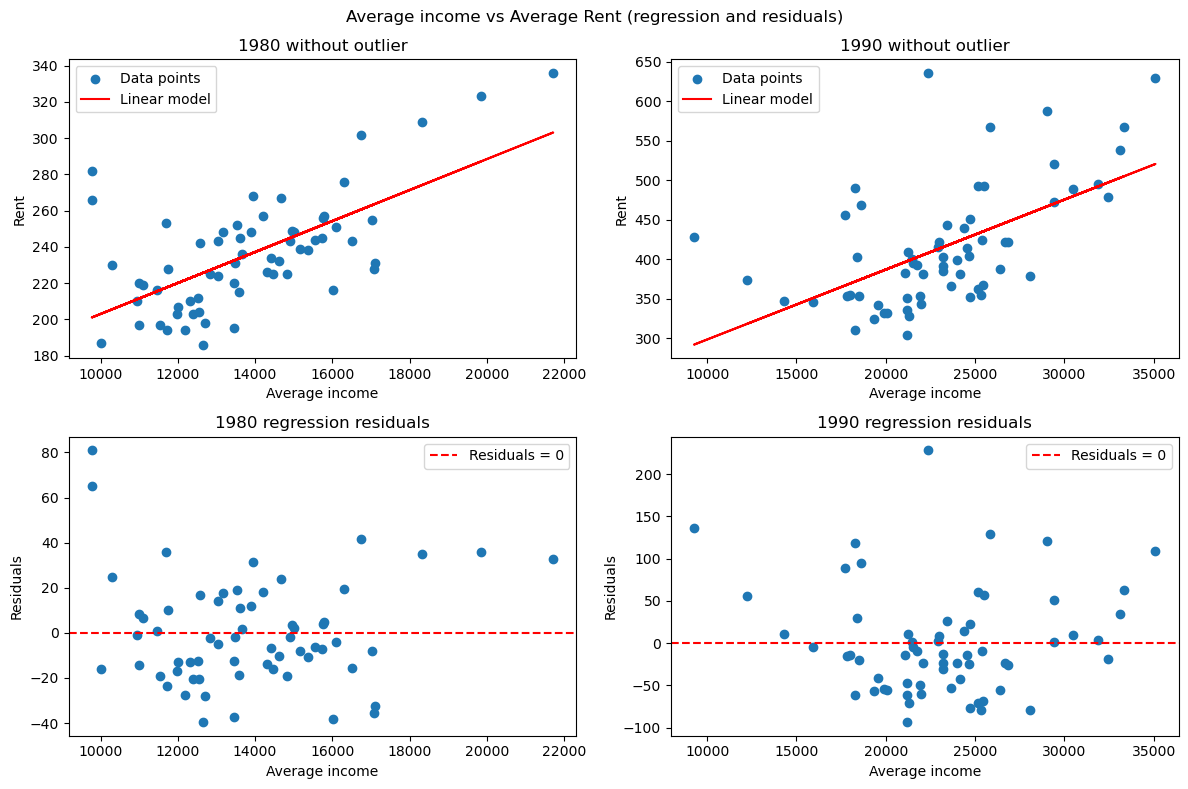

Beta coefficients without the outlier:
1980: B0 = 117.41378651164696 B1 = 0.008551991626355223
1990: B0 = 210.0511042927259 B1 = 0.008851140538253734


In [52]:
# Plot linear regression and its residuals
_, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

ax1.scatter(X80no, y80no, label='Data points')
ax1.plot(X80no, model80no.params.const + model80no.params.avginc * X80no, label='Linear model', color='red')

ax2.scatter(X90no, y90no, label='Data points')
ax2.plot(X90no, model90no.params.const + model90no.params.avginc * X90no, label='Linear model', color='red')

ax3.scatter(X80no, model80no.resid)
ax3.axhline(y=0, color='r', linestyle='--', label='Residuals = 0')

ax4.scatter(X90no, model90no.resid)
ax4.axhline(y=0, color='r', linestyle='--', label='Residuals = 0')

ax1.set_title('1980 without outlier')
ax1.set_xlabel("Average income")
ax1.set_ylabel("Rent")
ax1.legend()

ax2.set_title('1990 without outlier')
ax2.set_xlabel("Average income")
ax2.set_ylabel("Rent")
ax2.legend()

ax3.set_title('1980 regression residuals')
ax3.set_xlabel("Average income")
ax3.set_ylabel("Residuals")
ax3.legend()

ax4.set_title('1990 regression residuals')
ax4.set_xlabel("Average income")
ax4.set_ylabel("Residuals")
ax4.legend()

plt.suptitle('Average income vs Average Rent (regression and residuals)')
plt.tight_layout()
plt.show()

# Print beta coefficients
print("Beta coefficients without the outlier:")
print("1980: B0 =", model80no.params.const, "B1 =", model80no.params.avginc)
print("1990: B0 =", model90no.params.const, "B1 =", model90no.params.avginc)

## Multiple linear regression with following regressors: population, percent students, percent rented properties, average income

In [53]:
# Adding more parameters to linear regression to improve the fit of the model (1980)
X80 = DF80[['pop', 'pctstu', 'pctrnths', 'avginc']]
y80 = DF80['rent']

model80ex = sm.OLS(y80, sm.add_constant(X80)).fit()
y80predex = sm.add_constant(X80) @ model80ex.params.values

print(model80ex.summary())

# Adding more parameters to linear regression to improve the fit of the model (1990)
X90 = DF90[['pop', 'pctstu', 'pctrnths', 'avginc']]
y90 = DF90['rent']

model90ex = sm.OLS(y90, sm.add_constant(X90)).fit()
y90predex = sm.add_constant(X90) @ model90ex.params.values

print(model90ex.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     59.69
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           4.50e-20
Time:                        14:27:42   Log-Likelihood:                -279.37
No. Observations:                  64   AIC:                             568.7
Df Residuals:                      59   BIC:                             579.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -41.7608     26.512     -1.575      0.1

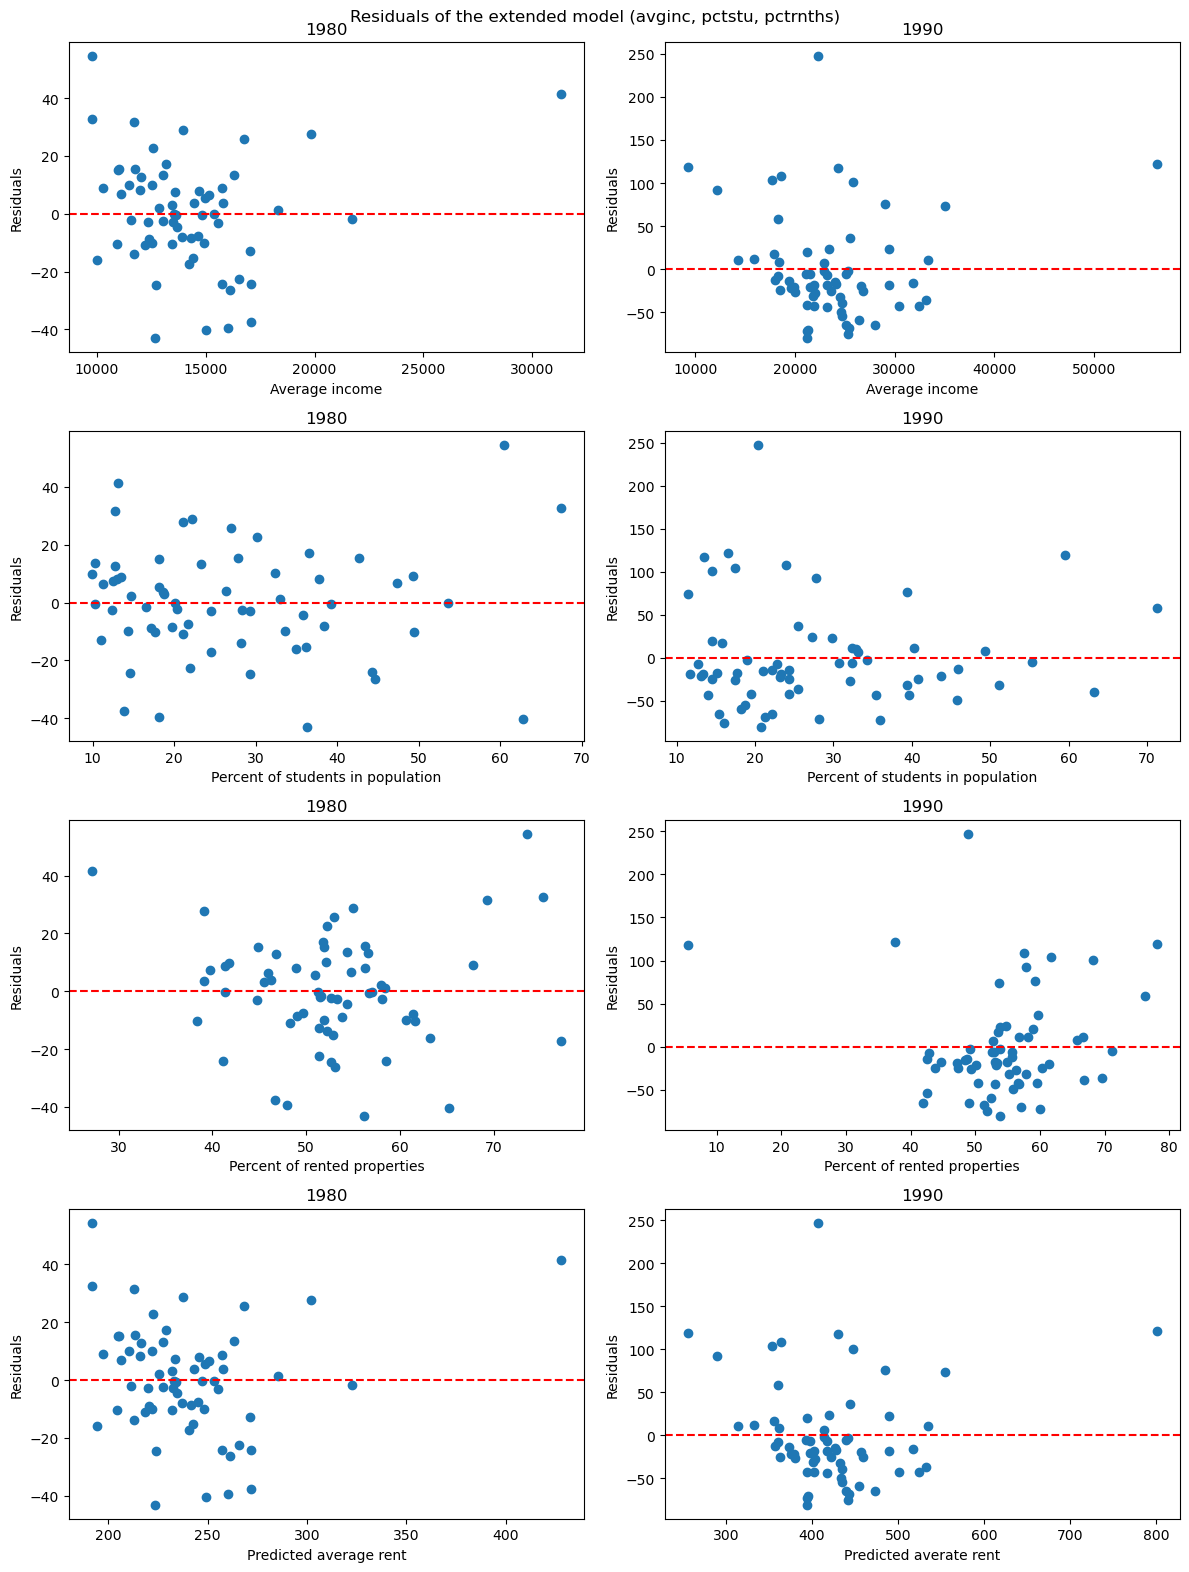

In [54]:
def populate_subplot(ax, x, resid, title, xlabel):
    ax.scatter(x, resid)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Residuals")

# Plot residuals in relation to different params and to predicted values
_, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(12, 16))

populate_subplot(ax1, X80[['avginc']], model80ex.resid, '1980', xlabel="Average income")
populate_subplot(ax2, X90[['avginc']], model90ex.resid, '1990', xlabel="Average income")
populate_subplot(ax3, X80[['pctstu']], model80ex.resid, '1980', xlabel="Percent of students in population")
populate_subplot(ax4, X90[['pctstu']], model90ex.resid, '1990', xlabel="Percent of students in population")
populate_subplot(ax5, X80[['pctrnths']], model80ex.resid, '1980', xlabel="Percent of rented properties")
populate_subplot(ax6, X90[['pctrnths']], model90ex.resid, '1990', xlabel="Percent of rented properties")
populate_subplot(ax7, y80pred, model80ex.resid, '1980', xlabel="Predicted average rent")
populate_subplot(ax8, y90pred, model90ex.resid, '1990', xlabel="Predicted averate rent")

plt.suptitle('Residuals of the extended model (avginc, pctstu, pctrnths)')
plt.tight_layout()
plt.show()

## Testing linear model assumptions
1. Model is linear
2. Matrix is non-random and has rank k
3. Error $u$ has $E(u)=0$ and $var(u)=\sigma^{2}I_{n}$
4. Error $u$ follows normal distribution

1. Model is linear
From the plots of the residuals we can see that there is no function misspecification and so we conclude that model is linear.

2. Matrix is non-random and has rank k
We can not check data for randomness.
If we take a look at the correlation matrix of the parameters we used in the model we see that they are not closely correlated. We computed XTX matrix and showed that it the matrix XTX is non-singular so we can conclude that data matrix has full rank.

In [55]:
# Correlation matrix
print("Correlation matrix")
print(DF[['pop', 'pctstu', 'avginc', 'pctrnths']].corr(numeric_only=True)[['pop', 'pctstu', 'avginc', 'pctrnths']])
print()

Correlation matrix
               pop    pctstu    avginc  pctrnths
pop       1.000000 -0.432984  0.187568 -0.156864
pctstu   -0.432984  1.000000 -0.175957  0.609148
avginc    0.187568 -0.175957  1.000000 -0.187621
pctrnths -0.156864  0.609148 -0.187621  1.000000



In [56]:
# Variance Inflation Factor analysis
# Add a constant term to the independent variables matrix (required for VIF calculation)
X_with_const = sm.add_constant(X80)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF 80"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Print the VIF data
print(vif_data)

X_with_const = sm.add_constant(X90)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF 90"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Print the VIF data
print(vif_data)

   Variable      VIF 80
0     const  114.476445
1       pop    1.312180
2    pctstu    1.976365
3  pctrnths    1.984627
4    avginc    1.372125
   Variable     VIF 90
0     const  63.266896
1       pop   1.275366
2    pctstu   1.965247
3  pctrnths   1.712542
4    avginc   1.136927


3. Error $u$ has $E(u)=0$ and $var(u)=\sigma^{2}I_{n}$
From the plot
s of the residuals we can see that variance is not changing much depending on the values of the regressor, so we can assume that $var(u)=\sigma^{2}I_{n}$.

In [57]:
# Perform Breusch-Pagan test
bp_test_statistic, bp_p_value, _, _ = het_breuschpagan(model80ex.resid, sm.add_constant(X80))

# Print the test statistic and p-value
print("Breusch-Pagan test statistic 80:", bp_test_statistic)
print("p-value 80:", bp_p_value)

print()
# Perform Breusch-Pagan test
bp_test_statistic, bp_p_value, _, _ = het_breuschpagan(model90ex.resid, sm.add_constant(X90))

# Print the test statistic and p-value
print("Breusch-Pagan test statistic 90:", bp_test_statistic)
print("p-value 90:", bp_p_value)


Breusch-Pagan test statistic 80: 12.684537048172999
p-value 80: 0.01292462766977498

Breusch-Pagan test statistic 90: 1.4558504481760863
p-value 90: 0.8344321647005662


4. Error $u$ follows normal distribution
Using Jaque-Bera test and histograms of the residuals we can conclude that residuals do not follow normal distribution.
What does it mean for our distribution?

In [58]:
print("Jaque-Bera test for residuals of extended linear model for 1980: ", jarque_bera(model80ex.resid))
print("Jaque-Bera test for residuals of extended linear model for 1990: ", jarque_bera(model90ex.resid))
print()
skewness_test_statistic, skewness_p_value = skewtest(model80ex.resid)
print("Skewness test statistic 80:", skewness_test_statistic)
print("p-value:", skewness_p_value)
print()
kurtosis_test_statistic, kurtosis_p_value = kurtosistest(model80ex.resid)
print("Kurtosis test statistic 80:", kurtosis_test_statistic)
print("p-value:", kurtosis_p_value)
print()

kewness_test_statistic, skewness_p_value = skewtest(model90ex.resid)
print("Skewness test statistic 90:", skewness_test_statistic)
print("p-value:", skewness_p_value)
print()
kurtosis_test_statistic, kurtosis_p_value = kurtosistest(model90ex.resid)
print("Kurtosis test statistic 90:", kurtosis_test_statistic)
print("p-value:", kurtosis_p_value)

Jaque-Bera test for residuals of extended linear model for 1980:  SignificanceResult(statistic=0.6209492297762935, pvalue=0.7330989339740029)
Jaque-Bera test for residuals of extended linear model for 1990:  SignificanceResult(statistic=54.34028924150875, pvalue=1.5854630268531777e-12)

Skewness test statistic 80: 0.3569661062172877
p-value: 0.7211171796528937

Kurtosis test statistic 80: 1.0716279100312156
p-value: 0.28388719219154723

Skewness test statistic 90: 0.3569661062172877
p-value: 1.1794648376841486e-05

Kurtosis test statistic 90: 3.186495908562846
p-value: 0.0014400752459529191


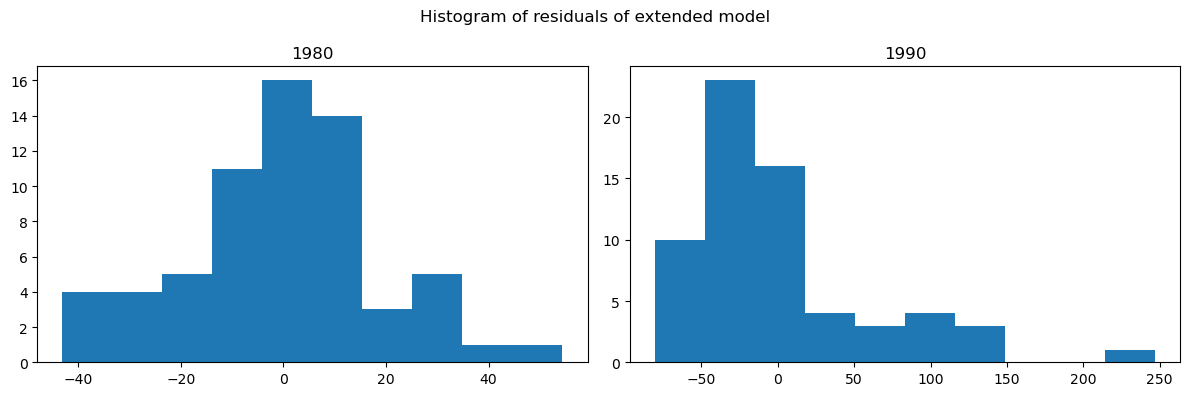

In [59]:
# Plot histogram of residuals for extended model
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(model80ex.resid)
ax2.hist(model90ex.resid)

ax1.set_title('1980')
ax2.set_title('1990')

plt.suptitle('Histogram of residuals of extended model')
plt.tight_layout()
plt.show()

## Testing whether population is 10 times more important that percent of students in the population
For the extended linear model that includes params: 'pop', 'pctstu', 'pctrnths', 'avginc'.

$H_0: \beta_1 - \beta_2 \cdot 10 = 0$ vs $H_1: \beta_1 - \beta_2 \cdot 10 \neq 0$
We can use single linear restriction test
$t_n = \frac{w'\hat\beta - r}{\sqrt{s^2 w'(X'X)^{-1}w}}\sim t_{(n-k)}$
where $w' = [0, 1, -10, 0, 0]$ and $r' = [0, 0, 0, 0, 0]$.
$s^2 = \frac{e'e}{n-k}$
With $n = 64$ and $k = 4$ we will use $t_{(60)} = 2.00$ as critical values for two-sided test with $\alpha = 0.05$.

First we standardize the regressors, such that the beta value indicates the increase in rent for an increase of 1 standard deviation of either regressor.

In [60]:
X80_standard = (X80 - np.mean(X80, axis=0))/np.std(X80)
model80ex_standard = sm.OLS(y80, sm.add_constant(X80_standard)).fit()
X90_standard = (X90 - np.mean(X90, axis=0))/np.std(X90)
model90ex_standard = sm.OLS(y90, sm.add_constant(X90_standard)).fit()

/Users/lshyshova/.conda/envs/data_science_practical/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/Users/lshyshova/.conda/envs/data_science_practical/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [61]:
def t_test(model, X, r):
    beta = model.params.values
    w = np.array(r).T
    e = model.resid
    n = len(X)
    k = len(beta)
    s2 = (e.T@e)/(n-k)
    XX = np.linalg.inv(X.T@X)
    numerator = w.T@beta
    denominator = np.sqrt(s2 * (w.T@XX@w))
    return numerator / denominator

r = [0, 1, -10, 0, 0]
print("T-test value for testing linear restriction for 1980:", t_test(model80ex_standard, sm.add_constant(X80_standard), r))
print("T-test value for testing linear restriction for 1990:", t_test(model90ex_standard, sm.add_constant(X90_standard), r))

T-test value for testing linear restriction for 1980: -2.1132839968634136
T-test value for testing linear restriction for 1990: -1.0306830019776905


In [62]:
# Same T-test using statsmodels.model.t_test function. Results are matching our results.
test_result = model80ex_standard.t_test('pop = 10 * pctstu')
print("1980")
print(test_result.summary())

test_result = model90ex_standard.t_test('pop = 10 * pctstu')
print()
print("1990")
print(test_result.summary())

1980
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0           -70.9981     33.596     -2.113      0.039    -138.224      -3.772

1990
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          -109.2880    106.034     -1.031      0.307    -321.462     102.887


## MSE and MAE for simple model

In [63]:
def mean_square_error(prediction, actual):
    return np.mean((prediction - actual) ** 2)


def mean_absolute_error(prediction, actual):
    return np.mean(np.abs(prediction - actual))

In [64]:
print("MSE for 80s: ", mean_square_error(y80pred, DF80['rent']))
print("MSE for 90s: ", mean_square_error(y90pred, DF90['rent']))
print("MAE for 80s: ", mean_absolute_error(y80pred, DF80['rent']))
print("MAE for 90s: ", mean_absolute_error(y90pred, DF90['rent']))

MSE for 80s:  618.6361937815333
MSE for 90s:  4292.0810668474
MAE for 80s:  18.88900167418278
MAE for 90s:  49.27689034122351


## MSE and MAE for extended model

In [65]:
print("MSE for 80s: ", mean_square_error(y80predex, DF80['rent']))
print("MSE for 90s: ", mean_square_error(y90predex, DF90['rent']))
print("MAE for 80s: ", mean_absolute_error(y80predex, DF80['rent']))
print("MAE for 90s: ", mean_absolute_error(y90predex, DF90['rent']))

MSE for 80s:  362.26716528959633
MSE for 90s:  3573.400967019027
MAE for 80s:  14.44591950222192
MAE for 90s:  43.34553240158388
